1/1 [==============================] - 0s 474ms/step
Similar images to the query image:
Similar Image 1: /content/drive/MyDrive/Recommender system/Men/Images/images_with_product_ids/36139.jpg
Similar Image 2: /content/drive/MyDrive/Recommender system/Men/Images/images_with_product_ids/8970.jpg
Similar Image 3: /content/drive/MyDrive/Recommender system/Men/Images/images_with_product_ids/4343.jpg
Similar Image 4: /content/drive/MyDrive/Recommender system/Men/Images/images_with_product_ids/35713.jpg
Similar Image 5: /content/drive/MyDrive/Recommender system/Men/Images/images_with_product_ids/13685.jpg


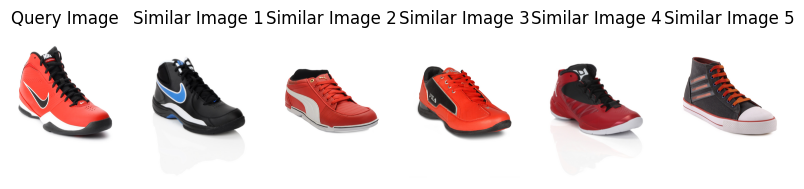

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Step 2: Preprocess images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Step 3: Extract features from images in the folder
def extract_features_from_folder(folder_path):
    image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]
    features = []
    for img_path in image_paths:
        x = preprocess_image(img_path)
        feature = model.predict(x)
        features.append(feature.flatten())
    return np.array(features), image_paths

# Step 4: Normalize features
def normalize_features(features):
    return features / np.linalg.norm(features, axis=1, keepdims=True)

# Step 5: Compute cosine similarity matrix
def compute_cosine_similarity(features):
    return cosine_similarity(features)

# Step 6: Given a query image, recommend similar images based on cosine similarity
def recommend_similar_images(query_img_index, cosine_sim_matrix, image_paths, top_n=5):
    similar_images_indices = np.argsort(cosine_sim_matrix[query_img_index])[::-1][1:top_n + 1]
    similar_images_paths = [image_paths[i] for i in similar_images_indices]
    return similar_images_paths

# Display query image and similar images
def display_images(query_img_path, similar_img_paths):
    plt.figure(figsize=(10, 5))

    # Display query image
    plt.subplot(1, len(similar_img_paths) + 1, 1)
    plt.imshow(Image.open(query_img_path))
    plt.title('Query Image')
    plt.axis('off')

    # Display similar images
    for i, img_path in enumerate(similar_img_paths):
        plt.subplot(1, len(similar_img_paths) + 1, i + 2)
        plt.imshow(Image.open(img_path))
        plt.title(f'Similar Image {i+1}')
        plt.axis('off')
    plt.show()

# Example usage
folder_path = '/content/drive/MyDrive/Recommender system/Men/Images/images_with_product_ids'
features, image_paths = extract_features_from_folder(folder_path)
normalized_features = normalize_features(features)
cosine_sim_matrix = compute_cosine_similarity(normalized_features)
query_img_index = 145 # Index of the query image in the list of image paths
similar_images_paths = recommend_similar_images(query_img_index, cosine_sim_matrix, image_paths)
print("Similar images to the query image:")
for i, img_path in enumerate(similar_images_paths):
    print(f"Similar Image {i+1}: {img_path}")

# Display query image and similar images
display_images(image_paths[query_img_index], similar_images_paths)
